David Tony Veliath <br>
AM.EN.U4CSE21219 <br>
19CSE304 Labsheet 6 (blog writing)

PART 1: SYNTHEETIC DATASET GENERATION

1) Import necesasary libraries

In [1195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import faker
import random
import datetime
import pydbgen

2) Decide upon and initialise relevant features

In [1196]:
Planet_Name = []
Stellar_Type = []
Planet_Type = []

STEs = [] #Surface Temperature Estimate
ESI = [] #Earth Similartiy Index
HZD = [] #Habitable Zone DIstance
PHI = [] #Planetary Habitability Index
SHI = [] #Stellar Habitability Index
BCI = [] #Biologial Complexity Index
TLI = [] #Tidal Locking Index

Habitability = []

2) Create functions to generate data for completely randomized features, subsequent features are dependant on these features. Some level of bias is required to artificially increase the number of planets with features desirable to habitability, as if we try to keep it realistic then habitable planets are a very small minority. This leads to a very one sided dataset which is undesirable for any actualk learning algorithms and visualisation.

In [1197]:
ST = {'O':0.10, 'B':0.20, 'A':0.30, 'F':0.85, 'G':0.95, 'K':1.00, 'M':0.55}
PT = {'Rocky':0.45, 'Super-Earth':1, 'Mini-neptune':0.65, 'Gas/Ice Giant':0.10}
STE = {'Hypopsychroplanet':0.2, 'Psychroplanet':0.6, 'Mesoplanet':1.0, 'Thermoplanet':0.6, 'Hyperthermoplanet':0.1}

def generate_exoplanet_name():
    prefixes = ['HD', 'HR', 'Gliese', 'WASP', 'Kepler', 'TRAPPIST', 'TOI', 'OGLE', 'COROT']
    suffixes = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'Prime', 'Majoris', 'Minoris']

    return random.choice(prefixes) + '-' + str(random.randint(1, 1000)) + ' ' + random.choice(suffixes)

def generate_stellar_type():
    x = random.randint(0, 10)
    return random.choice(['O', 'B', 'A', 'M']) if x<4 else random.choice(['F', 'G', 'K'])

def generate_planet_type():
    x = random.randint(0, 10)
    return random.choice(['Rocky', 'Mini-neptune', 'Gas/Ice Giant']) if x<4 else 'Super-Earth'

def generate_STE():
    x = random.randint(0, 10)
    return random.choice(['Hypopsychroplanet', 'Psychroplanet', 'Mesoplanet', 'Thermoplanet', 'Hyperthermoplanet']) if x<4 else 'Mesoplanet'

def generate_TLI():
    return random.randint(900, 2000)/1000

3) Create functions to semi-randomly generate data that correlate to previously generated features. As we are working with a limited amount of features we take a simplified appproach to generating values, with a reliance on randomness.

In [1198]:
def generate_ESI(st, pt, ste):
    return ST[st]*PT[pt]*STE[ste]*random.randint(850, 1000)/1000

def generate_HZD(st):
    return ST[st]*random.randint(600, 1000)/1000

def generate_PHI(st, pt, ste):
    return ST[st]*PT[pt]*STE[ste]*random.randint(750, 1000)/1000

def generate_SHI(st):
    return ST[st]*random.randint(800, 1000)/1000

def generate_BCI(st, pt):
    return ST[st]*PT[pt]*random.randint(100, 1000)/1000

def calculate_habitability(esi, hzd, phi, shi, bci, tli):
    tl=random.randint(750,1000)/1000 if tli>1 else random.randint(10, 150)/1000
    x = round(esi*hzd*phi*shi*bci*tl*6.9*150, 6)
    if x>100:
        return random.randint(75000000, 100000000)/1000000
    elif x < 15:
        return random.randint(0, 15000000)/1000000
    else:
        return x


4) Use the previously defined functions to actually populate the dataset with datapoints. We use a dataframe from the pandas module. Note that we create a few extra datapoints so that we can remove a few later in event of duplication

In [1199]:
num = 1010

for i in range(num):
    pn = generate_exoplanet_name()
    st = generate_stellar_type()
    pt = generate_planet_type()
    ste = generate_STE()
    esi = generate_ESI(st, pt, ste)
    hzd = generate_HZD(st)
    phi = generate_PHI(st, pt, ste)
    shi = generate_SHI(st)
    bci = generate_BCI(st, pt)
    tli = generate_TLI()
    h = calculate_habitability(esi, hzd, phi, shi, bci, tli)

    Planet_Name.append(pn)
    Stellar_Type.append(st)
    Planet_Type.append(pt)
    STEs.append(ste)
    ESI.append(esi)
    HZD.append(hzd)
    PHI.append(phi)
    SHI.append(shi)
    BCI.append(bci)
    TLI.append(tli)
    Habitability.append(h)

df = pd.DataFrame({'Planet Name':Planet_Name, 'Stellar Type':Stellar_Type, 'Planet Type':Planet_Type, 'Surface Temperature Estimate':STEs, 'Earth Similarity Index':ESI, 'Habitable Zone Distance':HZD, 'Planetary Habitability Index':PHI, 'Stellar Habitability Index':SHI, 'Biological Complexity Index':BCI, 'Tidal Locking Index':TLI, 'Habitability Percentage':Habitability})

PART 2: DATA EXPLORATION

1) Use info to list out the features and determine their datatypes

In [1200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Planet Name                   1010 non-null   object 
 1   Stellar Type                  1010 non-null   object 
 2   Planet Type                   1010 non-null   object 
 3   Surface Temperature Estimate  1010 non-null   object 
 4   Earth Similarity Index        1010 non-null   float64
 5   Habitable Zone Distance       1010 non-null   float64
 6   Planetary Habitability Index  1010 non-null   float64
 7   Stellar Habitability Index    1010 non-null   float64
 8   Biological Complexity Index   1010 non-null   float64
 9   Tidal Locking Index           1010 non-null   float64
 10  Habitability Percentage       1010 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.9+ KB


2) Use describe to get a rough idea about the distribution of data we are working with (There will be heavy bias with the categorical data but that is intentional)

In [1201]:
df.describe(include='O') #categorical data

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate
count,1010,1010,1010,1010
unique,1005,7,4,5
top,OGLE-994 i,G,Super-Earth,Mesoplanet
freq,2,234,634,737


In [1202]:
df.describe() #numerical data

,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,0.427676,0.569747,0.404458,0.638296,0.306334,1.436354,35.451727
std,0.331589,0.277979,0.314872,0.297676,0.267016,0.317535,35.810506
min,0.001794,0.060000,0.001588,0.080100,0.001410,0.901000,0.003651
25%,0.094359,0.274350,0.093870,0.291750,0.075825,1.159250,6.657643
50%,0.374265,0.644150,0.346815,0.782000,0.223400,1.426500,13.470512
75%,0.794750,0.794800,0.742475,0.864263,0.479643,1.708000,78.405761
max,0.993000,1.000000,0.997000,0.998000,0.987000,2.000000,99.971829


3) Use head and tail to get an idea of how the data looks

In [1203]:
df.head()

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
0,HR-228 f,G,Super-Earth,Mesoplanet,0.941450,0.85405,0.717250,0.8645,0.17195,0.998,3.752512
1,HR-742 d,F,Super-Earth,Thermoplanet,0.435030,0.57800,0.415650,0.6885,0.74970,1.302,53.657449
2,HR-618 Prime,K,Mini-neptune,Mesoplanet,0.590850,0.83400,0.634400,0.8060,0.50180,1.273,91.872829
3,OGLE-146 g,B,Super-Earth,Mesoplanet,0.198800,0.19360,0.183800,0.2000,0.02000,1.404,3.869895
4,HD-93 f,A,Mini-neptune,Hyperthermoplanet,0.018564,0.21180,0.016926,0.2436,0.12831,1.238,7.548623


In [1204]:
df.tail()

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
1005,HR-474 b,G,Gas/Ice Giant,Hyperthermoplanet,0.008607,0.82175,0.008807,0.80180,0.015105,1.900,5.645071
1006,HD-320 i,G,Mini-neptune,Hyperthermoplanet,0.060145,0.94620,0.058662,0.88730,0.377292,1.018,7.189553
1007,WASP-684 h,F,Super-Earth,Mesoplanet,0.797300,0.75990,0.640900,0.79985,0.097750,1.672,23.849316
1008,TOI-152 c,K,Super-Earth,Psychroplanet,0.581400,0.83300,0.536400,0.94100,0.462000,1.295,98.889711
1009,TOI-818 c,K,Rocky,Mesoplanet,0.445500,0.72100,0.392850,0.99000,0.202500,1.546,19.820116


PART 3: DATA TRANSFORMATION

1) First, we will find and eliminate duplicate values. As this is just an example dataset, we will do all operations directly on the dataset

In [1205]:
duplicated_rows = df[df.duplicated(subset='Planet Name', keep=False)]
duplicated_rows.head(20)

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
27,OGLE-909 b,F,Super-Earth,Mesoplanet,0.834700,0.82280,0.734400,0.74290,0.65535,1.884,85.394064
285,OGLE-38 Minoris,G,Gas/Ice Giant,Hypopsychroplanet,0.016872,0.80655,0.016207,0.84360,0.04522,0.943,6.449831
412,OGLE-398 e,K,Mini-neptune,Hypopsychroplanet,0.112450,0.97300,0.125840,0.92100,0.61230,1.805,10.857631
478,OGLE-994 i,A,Super-Earth,Mesoplanet,0.259800,0.29400,0.245100,0.25620,0.23940,1.341,1.920627
601,OGLE-38 Minoris,K,Super-Earth,Mesoplanet,0.969000,0.89900,0.919000,0.90600,0.41600,1.949,76.161212
653,Kepler-277 Minoris,O,Super-Earth,Hyperthermoplanet,0.009940,0.06020,0.009630,0.09510,0.04170,0.967,12.647946
691,OGLE-398 e,F,Gas/Ice Giant,Mesoplanet,0.076160,0.83130,0.081345,0.75310,0.06579,1.462,2.021236
722,OGLE-994 i,K,Rocky,Psychroplanet,0.264330,0.62500,0.234090,0.88200,0.09540,1.777,1.918287
956,Kepler-277 Minoris,K,Super-Earth,Mesoplanet,0.975000,0.94700,0.877000,0.93200,0.50800,1.869,97.574945
969,OGLE-909 b,F,Super-Earth,Mesoplanet,0.768400,0.74290,0.735250,0.71315,0.11985,1.802,32.599170


In [1206]:
df.drop_duplicates(subset='Planet Name', keep='first', inplace=True)
df.describe(include='O')

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate
count,1005,1005,1005,1005
unique,1005,7,4,5
top,HR-228 f,G,Super-Earth,Mesoplanet
freq,1,234,631,733


2) Now we will check for missing data. However, our method of data generation ensures no missing values.

In [1207]:
print("Number of rows with missing data: ", df.isnull().any(axis=1).sum())

Number of rows with missing data:  0


3) The next step is normalization, however the way the dataset is generated ensures that the necessary values are already normalized between 0 and 1. As such we can skip this step.

In [1208]:
numerical_columns = df.select_dtypes(include='number')
print(f"{'Column': <30}{'Max': <15}{'Min'}")
print()
for column in numerical_columns.columns:
    max_value = round(df[column].max(), 10)
    min_value = round(df[column].min(), 10)
    print(f"{column: <30}{max_value: <15}{min_value}")

Column                        Max            Min

Earth Similarity Index        0.993          0.001794
Habitable Zone Distance       1.0            0.06
Planetary Habitability Index  0.997          0.001588
Stellar Habitability Index    0.998          0.0801
Biological Complexity Index   0.987          0.00141
Tidal Locking Index           2.0            0.901
Habitability Percentage       99.971829      0.003651


4. Now we can try some feature engineering. We will create a new categorical column Habitable which will simply assign a Habitable or Uninhabitable value to each exoplanet on basis of the Habitability Percentage.

In [1209]:
habitable_threshold = 70
df['Habitable'] = df['Habitability Percentage'].apply(lambda x: 'Habitable' if x >= habitable_threshold else 'Uninhabitable') 
print(df['Habitable'].value_counts())


Uninhabitable    710
Habitable        295
Name: Habitable, dtype: int64


In [1210]:
df.head()

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage,Habitable
0,HR-228 f,G,Super-Earth,Mesoplanet,0.941450,0.85405,0.717250,0.8645,0.17195,0.998,3.752512,Uninhabitable
1,HR-742 d,F,Super-Earth,Thermoplanet,0.435030,0.57800,0.415650,0.6885,0.74970,1.302,53.657449,Uninhabitable
2,HR-618 Prime,K,Mini-neptune,Mesoplanet,0.590850,0.83400,0.634400,0.8060,0.50180,1.273,91.872829,Habitable
3,OGLE-146 g,B,Super-Earth,Mesoplanet,0.198800,0.19360,0.183800,0.2000,0.02000,1.404,3.869895,Uninhabitable
4,HD-93 f,A,Mini-neptune,Hyperthermoplanet,0.018564,0.21180,0.016926,0.2436,0.12831,1.238,7.548623,Uninhabitable


PART 4: VISUALIZATION

1) We can create a correlation heatmap using all numerical features of our dataset.

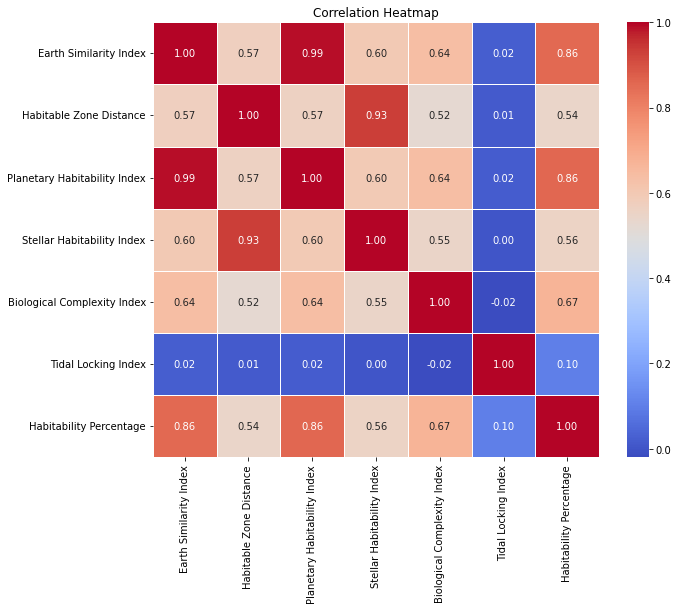

In [1211]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

2) We can visualise the mean value of each numerical value for Habitable and Uninhabitable planets.

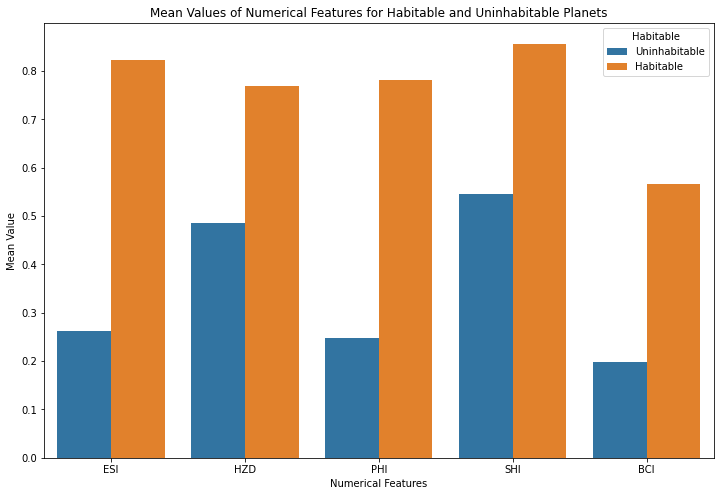

In [1224]:
name_abbreviations = {'Surface Temperature Estimate':'STE', 'Earth Similarity Index':'ESI', 'Habitable Zone Distance':'HZD', 'Planetary Habitability Index':'PHI', 'Stellar Habitability Index':'SHI', 'Biological Complexity Index':'BCI', 'Tidal Locking Index':'TLI'}
df_abbreviated = df.rename(columns=name_abbreviations).drop(columns=['Habitability Percentage', 'TLI'])
numerical_columns = df_abbreviated.select_dtypes(include='number')
melted_df = pd.melt(df_abbreviated, id_vars=['Habitable'], value_vars=numerical_columns.columns)

plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='Habitable', data=melted_df, errorbar=None)
plt.title('Mean Values of Numerical Features for Habitable and Uninhabitable Planets')
plt.xlabel('Numerical Features')
plt.ylabel('Mean Value')
plt.show()

3) We examine the relation between ESI and PHI to understand their similarities.

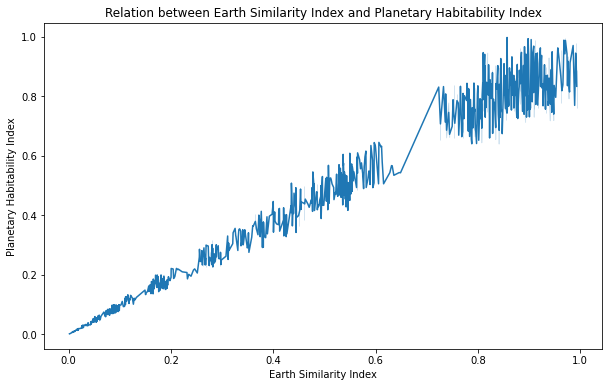

In [1213]:
# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Earth Similarity Index', y='Planetary Habitability Index', data=df)
plt.title('Relation between Earth Similarity Index and Planetary Habitability Index')
plt.xlabel('Earth Similarity Index')
plt.ylabel('Planetary Habitability Index')
plt.show()

4. We can plot a distribution chart of habitabiity percentage.

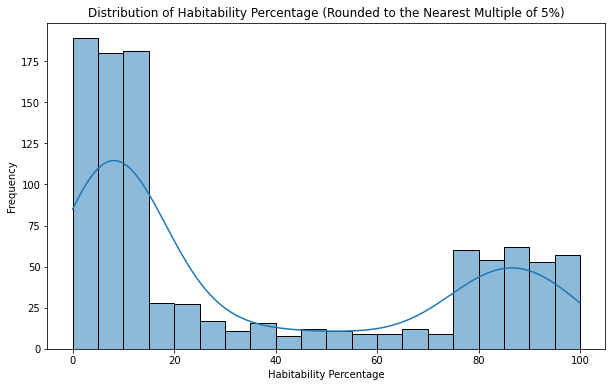

In [1214]:
 plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Habitability Percentage', bins=range(0, 101, 5), kde=True)
plt.title('Distribution of Habitability Percentage (Rounded to the Nearest Multiple of 5%)')
plt.xlabel('Habitability Percentage')
plt.ylabel('Frequency')
plt.show()

5. We plot the average SHI for each class of star.

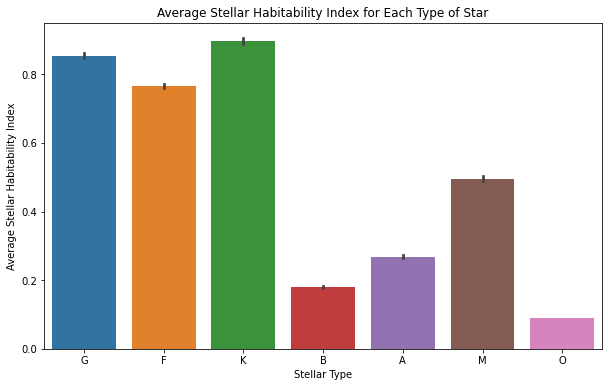

In [1215]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Stellar Type', y='Stellar Habitability Index', data=df)
plt.title('Average Stellar Habitability Index for Each Type of Star')
plt.xlabel('Stellar Type')
plt.ylabel('Average Stellar Habitability Index')
plt.show()

6. We plot the distribution of star types as a pie chart (it is very clearly biased but that is by design)

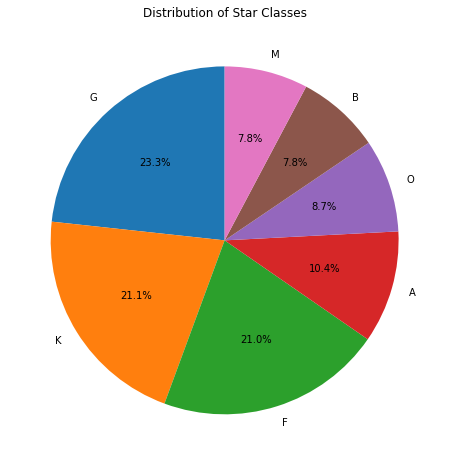

In [1216]:
star_class_counts = df['Stellar Type'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.pie(star_class_counts, labels=star_class_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Star Classes')
plt.show()

7. We demonstrate the distribution of habitable and uninhabitable exoplanets on the basis of habitability percentage.

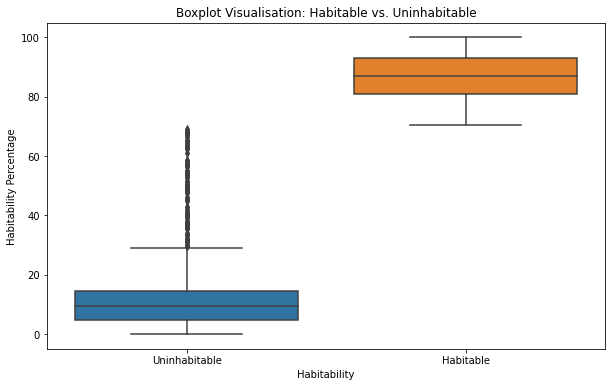

In [1217]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Habitable', y='Habitability Percentage', data=df)
plt.title('Boxplot Visualisation: Habitable vs. Uninhabitable')
plt.xlabel('Habitability')
plt.ylabel('Habitability Percentage')
plt.show()

8) We compare the maximimum habitability percentage for each type of planet. Then we check the averages and see if they tell the same story.

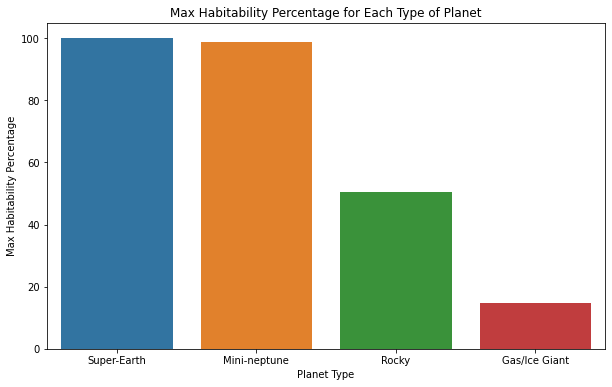

In [1231]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Planet Type', y='Habitability Percentage', data=df, estimator=max, errorbar=None)
plt.title('Max Habitability Percentage for Each Type of Planet')
plt.xlabel('Planet Type')
plt.ylabel('Max Habitability Percentage')
plt.show()


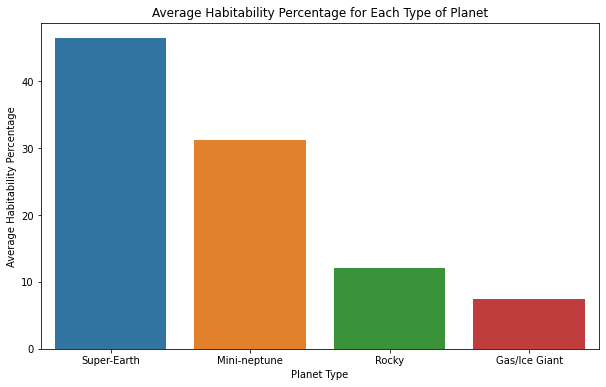

In [1232]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Planet Type', y='Habitability Percentage', data=df, errorbar=None)
plt.title('Average Habitability Percentage for Each Type of Planet')
plt.xlabel('Planet Type')
plt.ylabel('Average Habitability Percentage')
plt.show()

9) We can demonstrate the STE composition of each class of planet.

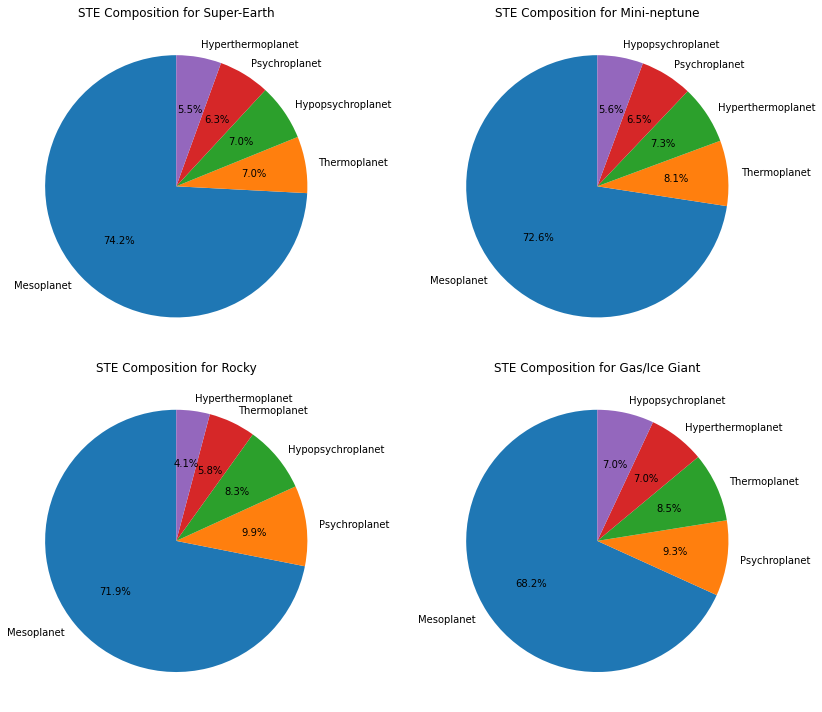

In [1219]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw=dict(aspect="equal"))
fig.patch.set_facecolor('white')
classifications = df['Planet Type'].unique()

for i, ax in enumerate(axes.flatten()):
    if i < len(classifications):
        current_classification = classifications[i]
        current_data = df[df['Planet Type'] == current_classification]['Surface Temperature Estimate']
        percentages = current_data.value_counts(normalize=True) * 100
        ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'STE Composition for {current_classification}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

10. We create a scatterplot between BCI and Habitability Percentage

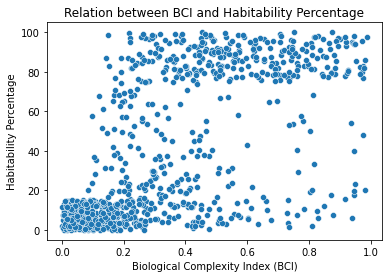

In [1233]:
sns.scatterplot(x='Biological Complexity Index', y='Habitability Percentage', data=df)
plt.title('Relation between BCI and Habitability Percentage')
plt.xlabel('Biological Complexity Index (BCI)')
plt.ylabel('Habitability Percentage')
plt.show()

Now we export our dataset to an Excel spreadsheet.

In [ ]:
excel_filename = 'sample_data.xlsx'
df.to_excel(excel_filename, index=False)